In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer

In [9]:
# Функція для візуалізації Q-Q plot
def plot_qq(data, title="Q-Q plot"):
    plt.figure(figsize=(12, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

In [10]:
data = pd.read_csv("Data_to_Transform.csv")

Minimum value in Moderate Positive Skew: 0.8999903238341513
Minimum value in Highly Positive Skew: 2.8950737861215154
Minimum value in Moderate Negative Skew: -6.335678966904441
Minimum value in Highly Negative Skew: -7.036091246253765


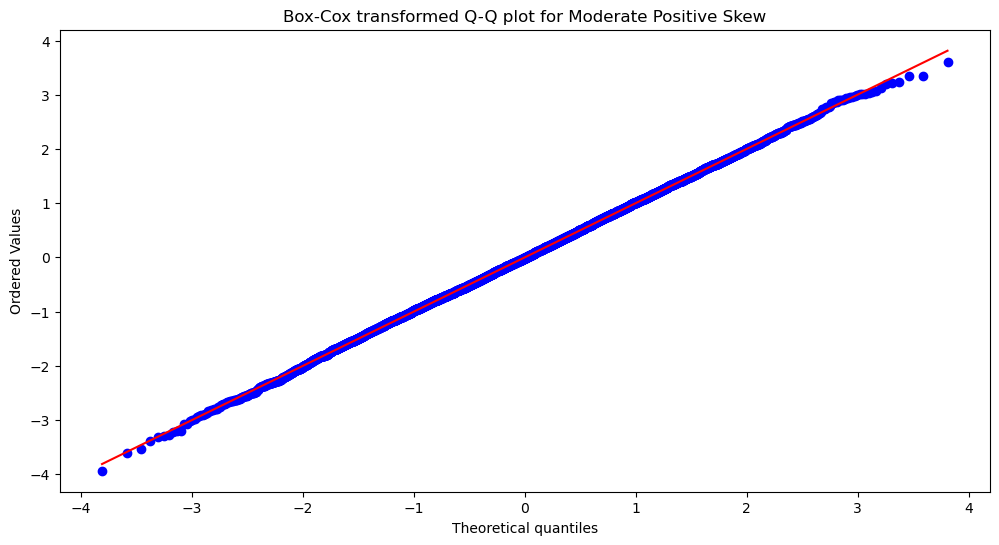

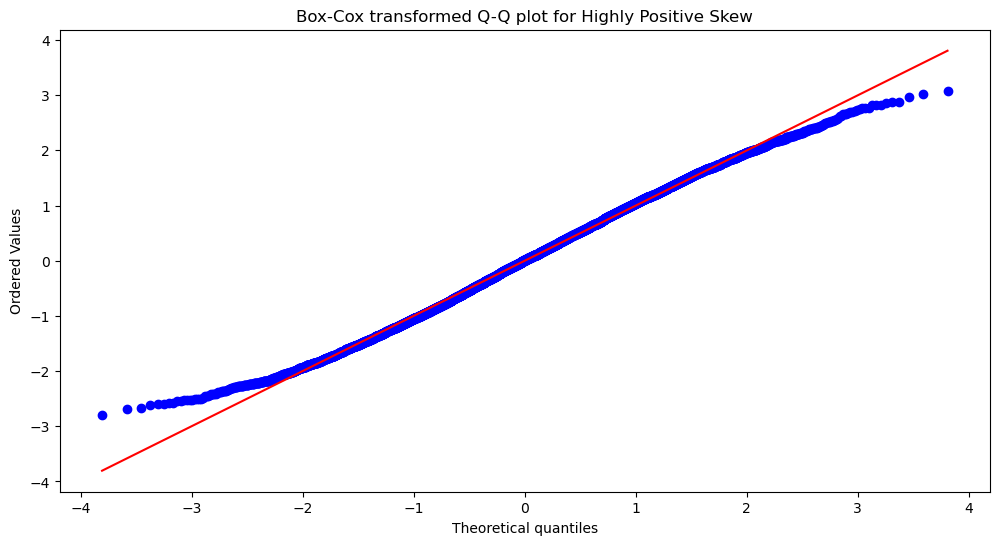

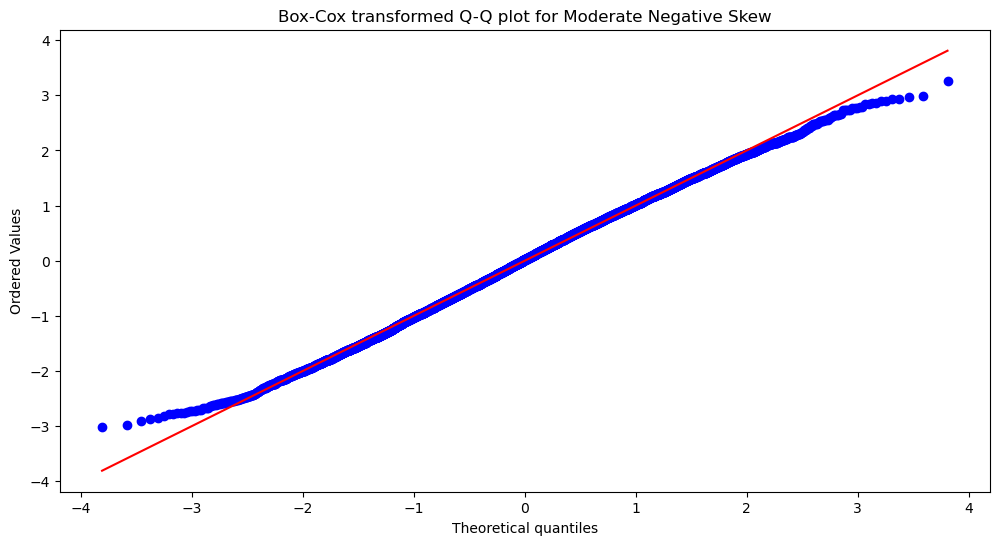

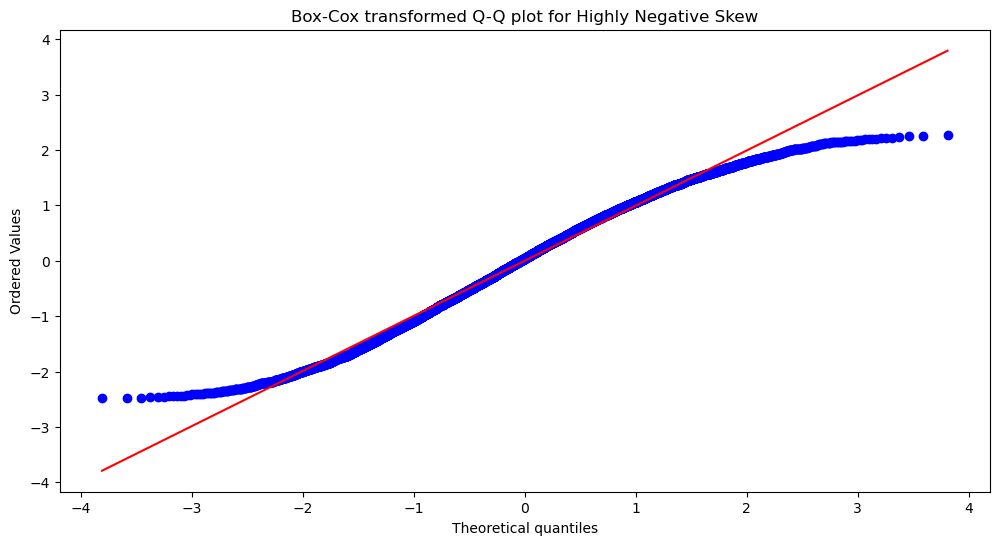

In [11]:
# Мінімальні значення в стовпці
for column in data.columns:
    print(f"Minimum value in {column}: {data[column].min()}")

# + константу до даних, якщо вони містять непозитивні значення
for column in data.columns:
    if data[column].min() <= 0:
        data[column] = data[column] + abs(data[column].min()) + 0.1  # 0.1 для запевнення позитивності

pt = PowerTransformer(method='box-cox')  # вик. трансформації Box-Cox

# Трансформацію Box-Cox
for column in data.columns:
    transformed_data = pt.fit_transform(data[column].values.reshape(-1, 1)).flatten()
    plot_qq(transformed_data, title=f"Box-Cox transformed Q-Q plot for {column}")